<a href="https://colab.research.google.com/github/22Divu/INT247-Project/blob/main/Project_Human_Activity_Recognition_Using_Smatphones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import time

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

In [ ]:
#Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Human Activity Recognition Using Smartphones Data.csv")

In [ ]:
#Top 5 Samples
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [ ]:
#Last 5 Samples
df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS
10298,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.072237,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,WALKING_UPSTAIRS


In [ ]:
#Names of Columns
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [ ]:
#Columns (1 - 561): Attributes as given in Dataset Description
#Column (562): Outcome of Experiment

In [ ]:
#Shape of Dataset
#Shape: Dimensions(Rows X Columns)
df.shape

(10299, 562)

In [ ]:
#From the above result we can say that:
#1. There are 10299 Rows and 562 Columns
#2. Hence there are 10299 samples/instances of data available to us.

In [ ]:
#Size of Dataset
#Size: Number of Entries
df.size

5788038

In [ ]:
#Since there are 561 feature, So we will apply Feature Selection to reduce the number of features.

In [ ]:
#For Feature Selection we need to drop "Activity" from df
x = df.drop(["Activity"], axis=1)
print("Shape of x is", x.shape)

Shape of x is (10299, 561)


In [ ]:
#y require only "Activity" column
y = df["Activity"]
print("Shape of y is",y.shape)

Shape of y is (10299,)


In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
model = SelectFromModel(RandomForestClassifier(n_estimators=100,max_depth=5),
                        prefit=False,max_features=10)
model.fit(x,y)
s = model.transform(x)
print(x.shape)
print(s.shape)

(10299, 561)
(10299, 10)


In [ ]:
#Converting Array to DataFrame
df_new = pd.DataFrame(s,columns=["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10"])
df_new.shape

(10299, 10)

In [ ]:
#Adding Activity Column
df_new["Activity"] = y

In [ ]:
#Dataset after Feature Selection
df_new

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Activity
0,0.963396,-0.140840,0.892055,-0.161265,0.977436,-0.123213,0.899469,-0.994488,-0.996737,-0.841247,STANDING
1,0.966561,-0.141551,0.892060,-0.161343,0.984520,-0.114893,0.907829,-0.995632,-0.997425,-0.844788,STANDING
2,0.966878,-0.142010,0.892401,-0.163711,0.986770,-0.114893,0.908668,-0.990933,-0.995163,-0.848933,STANDING
3,0.967615,-0.143976,0.893817,-0.163711,0.986821,-0.121336,0.910621,-0.994266,-0.993402,-0.848649,STANDING
4,0.968224,-0.148750,0.893817,-0.166786,0.987434,-0.121834,0.912235,-0.996597,-0.997009,-0.847865,STANDING
...,...,...,...,...,...,...,...,...,...,...,...
10294,0.890968,-0.276718,0.823272,-0.278442,0.903413,-0.272203,0.712964,-0.391041,-0.445064,-0.651732,WALKING_UPSTAIRS
10295,0.891281,-0.274976,0.823272,-0.278442,0.903793,-0.268172,0.713748,-0.394675,-0.616711,-0.655181,WALKING_UPSTAIRS
10296,0.890897,-0.276165,0.822107,-0.273818,0.903793,-0.268172,0.712784,-0.438249,-0.564495,-0.655357,WALKING_UPSTAIRS
10297,0.892736,-0.262356,0.823679,-0.272785,0.909007,-0.244744,0.717394,-0.449039,-0.590170,-0.659719,WALKING_UPSTAIRS


In [ ]:
#Top 5 Samples
df_new.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Activity
0,0.963396,-0.140840,0.892055,-0.161265,0.977436,-0.123213,0.899469,-0.994488,-0.996737,-0.841247,STANDING
1,0.966561,-0.141551,0.892060,-0.161343,0.984520,-0.114893,0.907829,-0.995632,-0.997425,-0.844788,STANDING
2,0.966878,-0.142010,0.892401,-0.163711,0.986770,-0.114893,0.908668,-0.990933,-0.995163,-0.848933,STANDING
3,0.967615,-0.143976,0.893817,-0.163711,0.986821,-0.121336,0.910621,-0.994266,-0.993402,-0.848649,STANDING
4,0.968224,-0.148750,0.893817,-0.166786,0.987434,-0.121834,0.912235,-0.996597,-0.997009,-0.847865,STANDING


In [ ]:
#Last 5 Samples
df_new.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Activity
10294,0.890968,-0.276718,0.823272,-0.278442,0.903413,-0.272203,0.712964,-0.391041,-0.445064,-0.651732,WALKING_UPSTAIRS
10295,0.891281,-0.274976,0.823272,-0.278442,0.903793,-0.268172,0.713748,-0.394675,-0.616711,-0.655181,WALKING_UPSTAIRS
10296,0.890897,-0.276165,0.822107,-0.273818,0.903793,-0.268172,0.712784,-0.438249,-0.564495,-0.655357,WALKING_UPSTAIRS
10297,0.892736,-0.262356,0.823679,-0.272785,0.909007,-0.244744,0.717394,-0.449039,-0.590170,-0.659719,WALKING_UPSTAIRS
10298,0.894331,-0.261407,0.825359,-0.272785,0.909007,-0.242839,0.721405,-0.471700,-0.491923,-0.660080,WALKING_UPSTAIRS


In [ ]:
#Description of the Dataset
df_new.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.669226,0.004039,0.609058,-0.010322,0.683762,0.016608,0.446207,-0.636852,-0.711609,-0.496522
std,0.515486,0.378909,0.509003,0.366683,0.507052,0.376404,0.696455,0.413604,0.338392,0.511158
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.811740,-0.242943,0.755597,-0.249559,0.816634,-0.229644,0.520927,-0.991290,-0.993586,-0.817288
50%,0.921793,-0.143551,0.859035,-0.150943,0.928752,-0.128351,0.791235,-0.957788,-0.967531,-0.715631
75%,0.954667,0.118905,0.887846,0.117878,0.966557,0.128991,0.876567,-0.280286,-0.444721,-0.521503
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking for the Missing Values
print(df_new.isna().sum())

F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
Activity    0
dtype: int64


In [ ]:
#Hence from the above table it can be said that there are no missing values in the dataset.

In [ ]:
#Checking for Categorical Data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   F1        10299 non-null  float64
 1   F2        10299 non-null  float64
 2   F3        10299 non-null  float64
 3   F4        10299 non-null  float64
 4   F5        10299 non-null  float64
 5   F6        10299 non-null  float64
 6   F7        10299 non-null  float64
 7   F8        10299 non-null  float64
 8   F9        10299 non-null  float64
 9   F10       10299 non-null  float64
 10  Activity  10299 non-null  object 
dtypes: float64(10), object(1)
memory usage: 885.2+ KB


In [ ]:
#Output (Activity) Values
df_new['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [ ]:
#Label Encoding for Activity
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['Activity'] = le.fit_transform(df_new[["Activity"]])
print(df_new)

             F1        F2        F3        F4        F5        F6        F7  \
0      0.963396 -0.140840  0.892055 -0.161265  0.977436 -0.123213  0.899469   
1      0.966561 -0.141551  0.892060 -0.161343  0.984520 -0.114893  0.907829   
2      0.966878 -0.142010  0.892401 -0.163711  0.986770 -0.114893  0.908668   
3      0.967615 -0.143976  0.893817 -0.163711  0.986821 -0.121336  0.910621   
4      0.968224 -0.148750  0.893817 -0.166786  0.987434 -0.121834  0.912235   
...         ...       ...       ...       ...       ...       ...       ...   
10294  0.890968 -0.276718  0.823272 -0.278442  0.903413 -0.272203  0.712964   
10295  0.891281 -0.274976  0.823272 -0.278442  0.903793 -0.268172  0.713748   
10296  0.890897 -0.276165  0.822107 -0.273818  0.903793 -0.268172  0.712784   
10297  0.892736 -0.262356  0.823679 -0.272785  0.909007 -0.244744  0.717394   
10298  0.894331 -0.261407  0.825359 -0.272785  0.909007 -0.242839  0.721405   

             F8        F9       F10  Activity  
0  

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Value Count for Activity
df_new['Activity'].value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

In [ ]:
# From Above we can say

#      Count      Output        According to dataset description
#       1944        0                 Laying
#       1906        2                 Standing
#       1777        1                 Sitting
#       1722        3                 Walking
#       1544        5                 Walking_Upstairs
#       1406        4                 Walking_Downstairs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


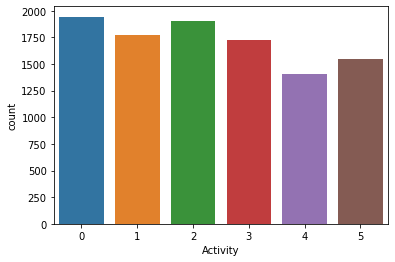

In [ ]:
#Lets Vizualize the Above Statistics Graphically
sns.countplot(df_new["Activity"])

In [ ]:
#Correlation between Attributes
cor=df_new.corr()
cor

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Activity
F1,1.000000,-0.770334,0.997516,-0.773641,0.999021,-0.765906,0.983816,0.396290,0.386583,-0.989280,0.646631
F2,-0.770334,1.000000,-0.770148,0.997824,-0.767588,0.996900,-0.785638,-0.480782,-0.463151,0.747495,-0.716847
F3,0.997516,-0.770148,1.000000,-0.771521,0.994282,-0.768424,0.981001,0.404880,0.394948,-0.986279,0.652273
F4,-0.773641,0.997824,-0.771521,1.000000,-0.772431,0.990897,-0.787474,-0.474247,-0.456822,0.750624,-0.710595
F5,0.999021,-0.767588,0.994282,-0.772431,1.000000,-0.761182,0.983074,0.387836,0.378388,-0.988757,0.639321
F6,-0.765906,0.996900,-0.768424,0.990897,-0.761182,1.000000,-0.782096,-0.484550,-0.466816,0.743310,-0.719360
F7,0.983816,-0.785638,0.981001,-0.787474,0.983074,-0.782096,1.000000,0.393329,0.384117,-0.990372,0.636015
F8,0.396290,-0.480782,0.404880,-0.474247,0.387836,-0.484550,0.393329,1.000000,0.978214,-0.387628,0.782292
F9,0.386583,-0.463151,0.394948,-0.456822,0.378388,-0.466816,0.384117,0.978214,1.000000,-0.379502,0.759457
F10,-0.989280,0.747495,-0.986279,0.750624,-0.988757,0.743310,-0.990372,-0.387628,-0.379502,1.000000,-0.615424


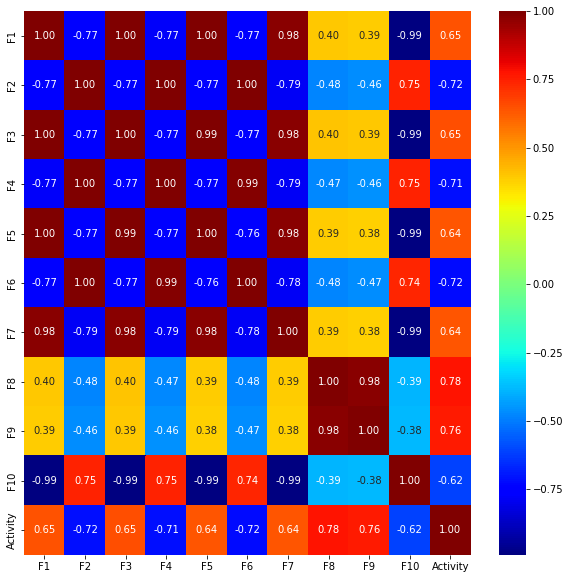

In [ ]:
#Heatmap for better visualizing the correlation
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,fmt='.2f',cmap='jet',annot_kws={'size':10},cbar=True)

<Figure size 720x720 with 0 Axes>

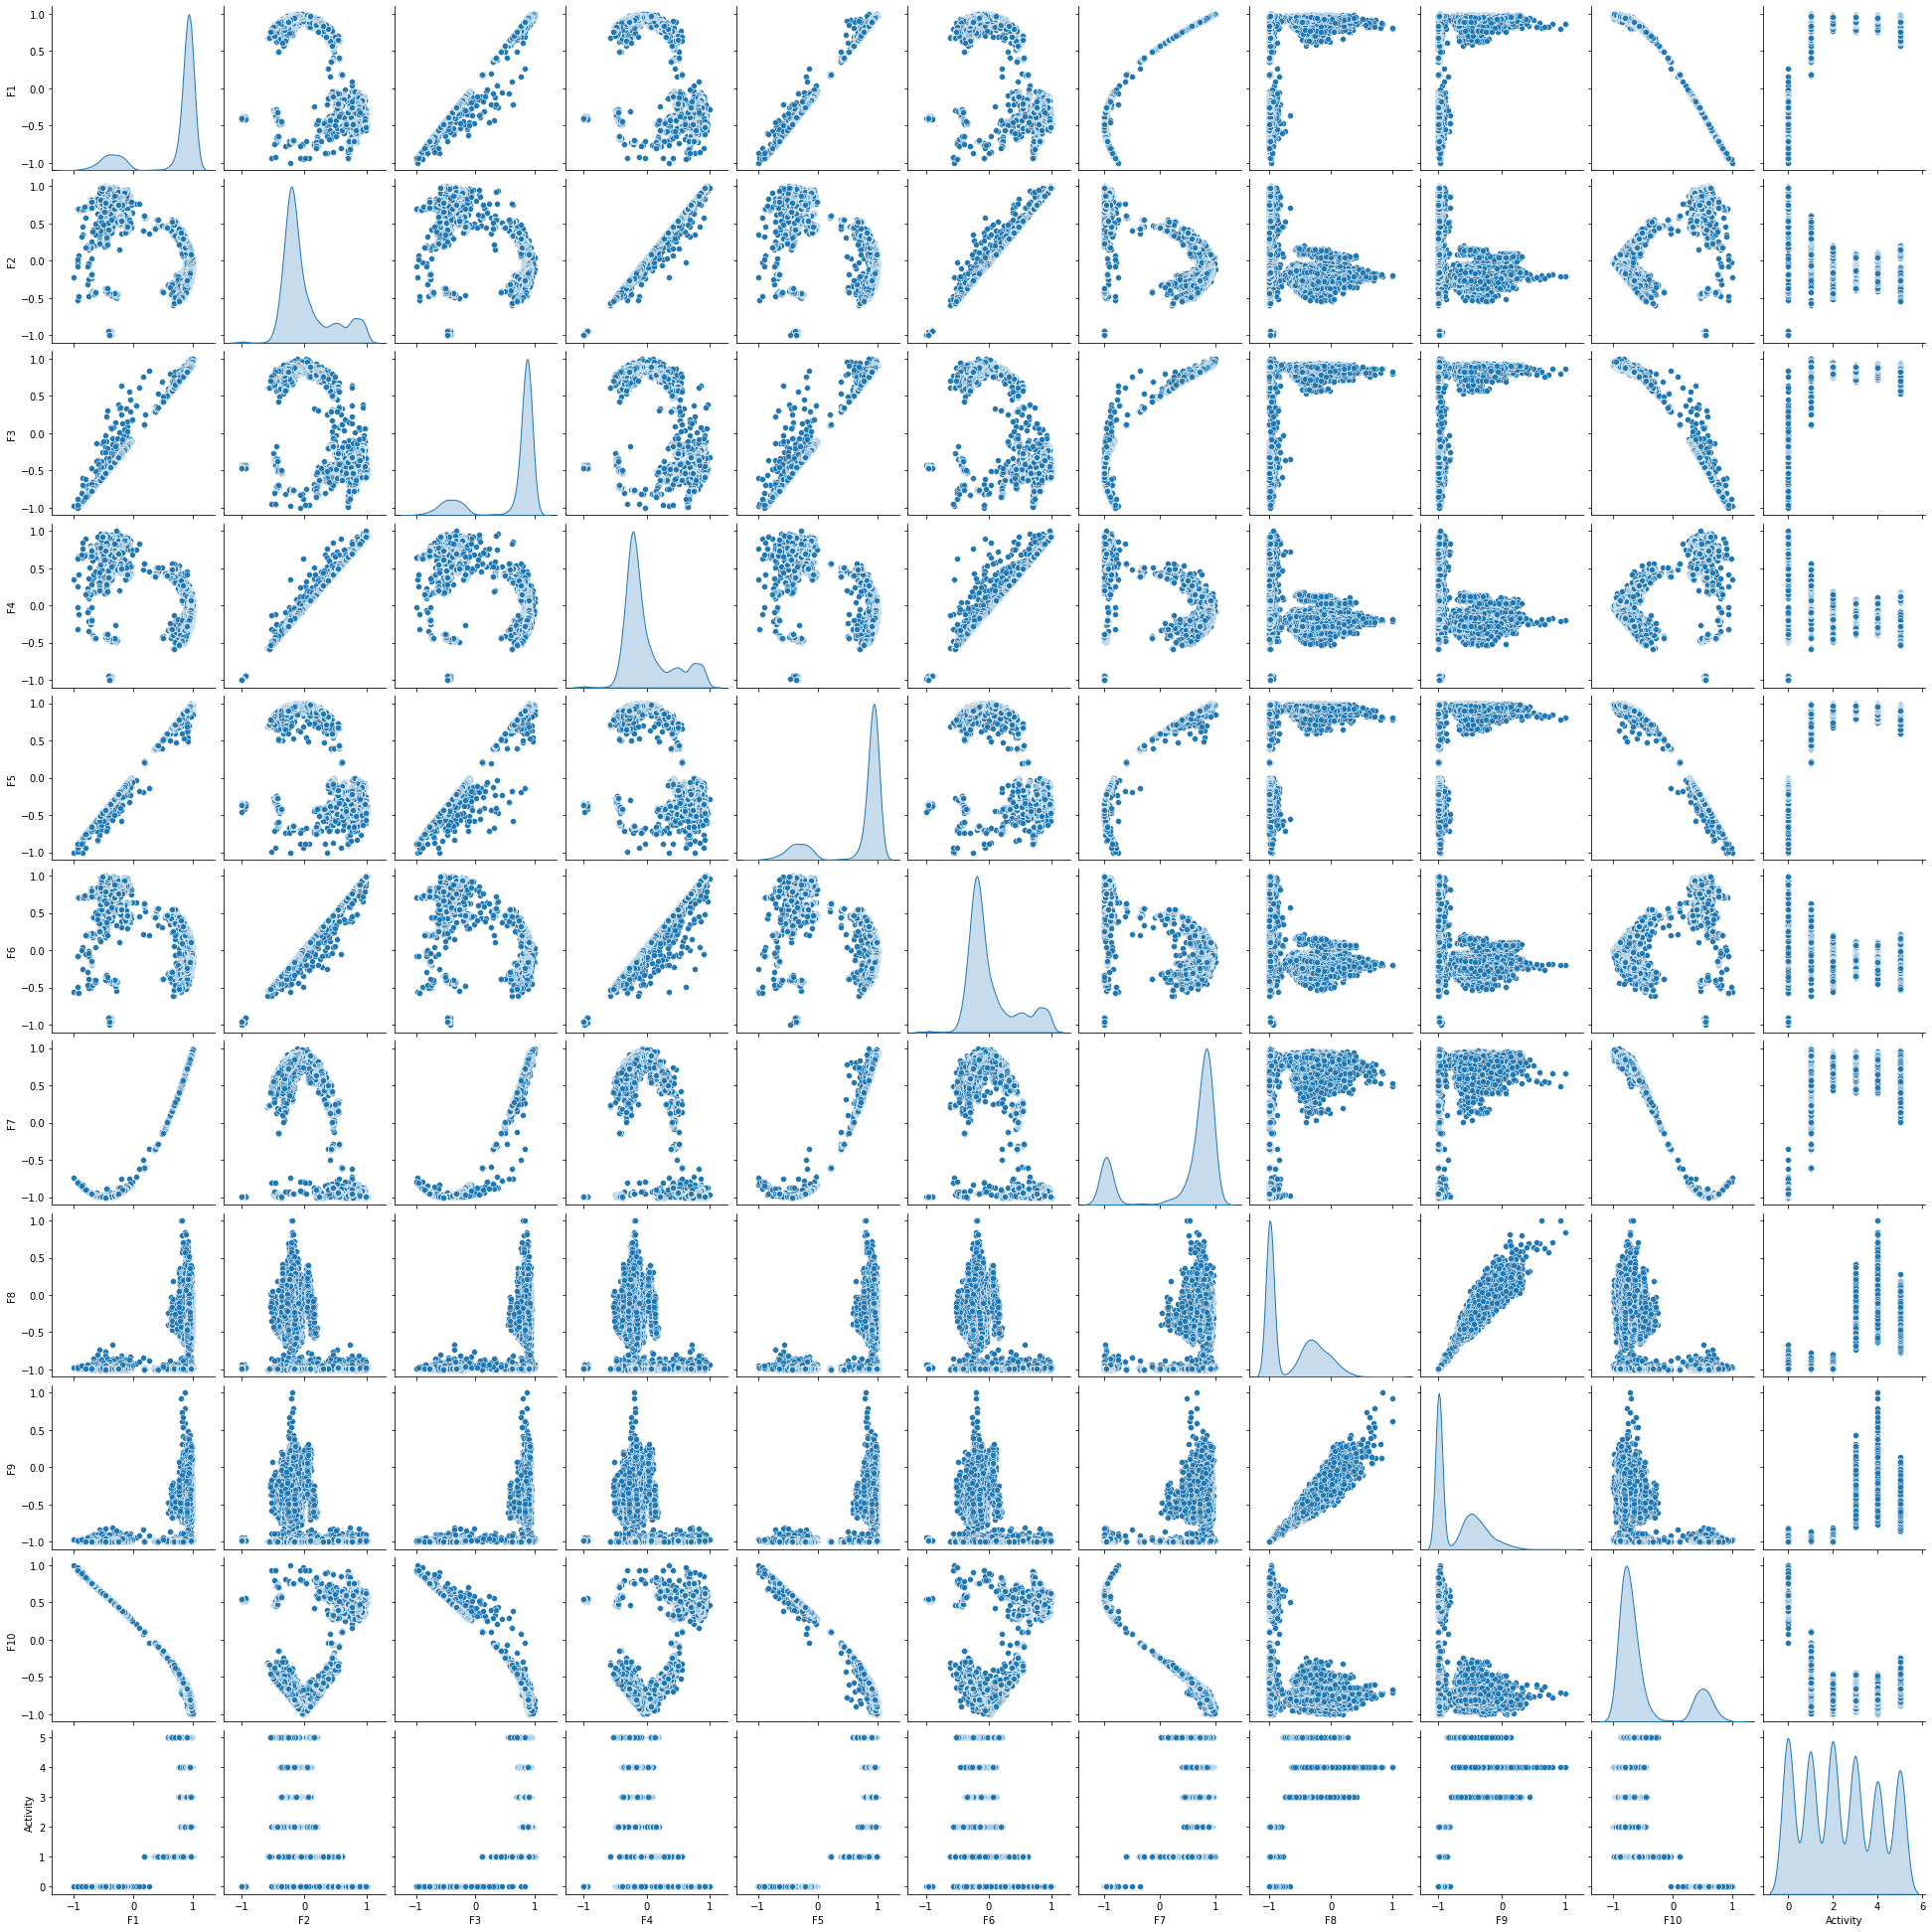

In [ ]:
#Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,10))
sns.pairplot(df_new[df_new.columns],diag_kind='kde')

In [ ]:
#Splitting the data into training and testing set
#70% Training Data
#30% Test Data

from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_new,train_size=0.7,random_state=0)
print("Dimensions of Training Data",df_train.shape)
print("Dimensions of Testing Data",df_test.shape)

Dimensions of Training Data (7209, 11)
Dimensions of Testing Data (3090, 11)


In [ ]:
#Training Data
#To train the model we need to separate out our train data into two sets
#x_train = contains the features only
#y_train = contains the output only
#Both x_train and y_train are respective to each other

In [ ]:
#For x_train we need to drop "Activity" from df_train
x_train = df_train.drop(["Activity"],axis=1)
print("Shape of x_train",x_train.shape)

Shape of x_train (7209, 10)


In [ ]:
#For y_train we require only "Activity" column
y_train = df_train["Activity"]
print("Shape of y_train",y_train.shape)

Shape of y_train (7209,)


In [ ]:
print("Before Feature Scaling \n",x_train.head())

#Inorder to bring all the features at the same scale we need to apply feature scaling on x_train
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns)
print("After Feature Scaling \n",x_train.head())

Before Feature Scaling 
             F1        F2        F3        F4        F5        F6        F7  \
2703  0.918598 -0.341537  0.854060 -0.342219  0.930758 -0.319709  0.782989   
1910  0.933972 -0.174047  0.860947 -0.186309  0.952863 -0.150375  0.822529   
445   0.939656 -0.273957  0.867094 -0.280476  0.956581 -0.253767  0.837266   
7159  0.941877 -0.198184  0.882531 -0.196343  0.945731 -0.193150  0.843126   
4691  0.853570 -0.365783  0.799413 -0.371437  0.861442 -0.339537  0.620518   

            F8        F9       F10  
2703 -0.229079 -0.490393 -0.676979  
1910 -0.994416 -0.996936 -0.733072  
445  -0.325311 -0.402340 -0.729257  
7159 -0.688045 -0.734392 -0.821572  
4691  0.110060 -0.245025 -0.595484  
After Feature Scaling 
          F1        F2        F3        F4        F5        F6        F7  \
0  0.485091 -0.909335  0.482593 -0.901946  0.488198 -0.891287  0.485021   
1  0.515022 -0.469770  0.496169 -0.479050  0.531936 -0.443897  0.541751   
2  0.526087 -0.731975  0.508289 -0.

In [ ]:
#Testing Data
#To test the model we need to separate out our test data into two sets
#x_test = contains the features only
#y_test = contains the output only
#Both x_test and y_test are respective to each other

In [ ]:
#For x_test we need to drop "Activity" from df_test
x_test = df_test.drop(["Activity"],axis=1)
print("Shape of x_test",x_test.shape)

Shape of x_test (3090, 10)


In [ ]:
#For y_test we require only "Activity" column
y_test = df_test["Activity"]
print("Shape of y_test",y_test.shape)

Shape of y_test (3090,)


In [ ]:
print("Before Feature Scaling \n",x_test.head())

#Inorder to bring all the features at the same scale we need to apply feature scaling on x_test
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_test = pd.DataFrame(ss.fit_transform(x_test),columns=x_test.columns)
print("After Feature Scaling \n",x_test.head())

Before Feature Scaling 
             F1        F2        F3        F4        F5        F6        F7  \
6122  0.964043  0.088851  0.889899  0.062071  0.982730  0.112339  0.901169   
7629  0.874430 -0.357742  0.813001 -0.365847  0.884131 -0.333595  0.671780   
4277 -0.150461  0.603124 -0.211372  0.562130 -0.115837  0.618331 -0.903407   
9362  0.906497 -0.314620  0.838955 -0.320605  0.918011 -0.296677  0.752147   
7436  0.930367 -0.346932  0.865077 -0.360740  0.933918 -0.325252  0.813256   

            F8        F9       F10  
6122 -0.996851 -0.997883 -0.880855  
7629  0.357232  0.013892 -0.641387  
4277 -0.985218 -0.985437  0.359994  
9362 -0.525500 -0.558830 -0.695555  
7436 -0.322497 -0.541825 -0.678212  
After Feature Scaling 
          F1        F2        F3        F4        F5        F6        F7  \
0  0.568250  0.232572  0.548401  0.204037  0.586479  0.264225  0.650271   
1  0.395793 -0.962070  0.398497 -0.978254  0.393455 -0.936433  0.320260   
2 -1.576563  1.608262 -1.598379  1.

In [ ]:
#Now we are done with the Data Preprocessing part.

In [ ]:
#Now we will build different Classificaiton Models and compare their performance.

In [ ]:
#First Model
#Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
st = time.time()
perceptron.fit(x_train,y_train)
et = time.time()
print("Training Perceptron Model -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Training Perceptron Model -> Time taken : 43.5 milliseconds


In [ ]:
#Predicting Output Class on x_train
st = time.time()
m1_pred_train = perceptron.predict(x_train)
et = time.time()
print("Predicting on Training Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

#Predicting Output Class on x_test
st = time.time()
m1_pred_test = perceptron.predict(x_test)
et = time.time()
print("Predicting on Testing Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Predicting on Training Data -> Time taken : 9.5 milliseconds
Predicting on Testing Data -> Time taken : 2.0 milliseconds


In [ ]:
#Printing Accuracy score on pred_train and pred_test
print("Perceptron Model Training Accuracy :",accuracy_score(m1_pred_train,y_train))

print("Perceptron Model Testing Accuracy :",accuracy_score(m1_pred_test,y_test))

Perceptron Model Training Accuracy : 0.800943265362741
Perceptron Model Testing Accuracy : 0.7980582524271844


Perceptron Training Confusion Matrix 
 [[1364    3    0    0    0    0]
 [   0 1076  138    0    0    6]
 [   0  235 1085    0    0    3]
 [   0    0   14  970   86  158]
 [   0    0    0  340  537  118]
 [   0    3   51  212   68  742]]


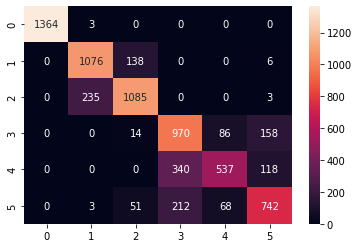

In [ ]:
#Plotting Confusion Matrix
#Training
m1_train_cm=confusion_matrix(y_train,m1_pred_train)
print("Perceptron Training Confusion Matrix \n",m1_train_cm)
sns.heatmap(m1_train_cm,annot=True,fmt='.0f')

Perceptron Testing Confusion Matrix 
 [[576   1   0   0   0   0]
 [  0 494  56   0   1   6]
 [  0 115 465   0   0   3]
 [  0   0   6 410  25  53]
 [  0   0   0 155 216  40]
 [  0   1  24 107  31 305]]


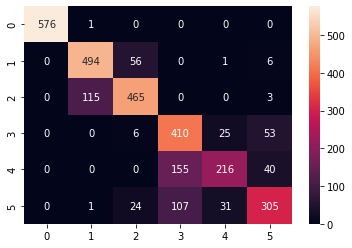

In [ ]:
#Plotting Confusion Matrix
#Testing
m1_test_cm=confusion_matrix(y_test,m1_pred_test)
print("Perceptron Testing Confusion Matrix \n",m1_test_cm)
sns.heatmap(m1_test_cm,annot=True,fmt='.0f')

In [ ]:
#Printing Classification Report For Perceptron Model

#Training 
m1_train_cpr=classification_report(m1_pred_train,y_train)
print("Perceptron Training Classification Report: \n",m1_train_cpr)

#Testing
m1_test_cpr=classification_report(m1_pred_test,y_test)
print("Perceptron Testing Classification Report: \n",m1_test_cpr)

Perceptron Training Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1364
           1       0.88      0.82      0.85      1317
           2       0.82      0.84      0.83      1288
           3       0.79      0.64      0.71      1522
           4       0.54      0.78      0.64       691
           5       0.69      0.72      0.71      1027

    accuracy                           0.80      7209
   macro avg       0.79      0.80      0.79      7209
weighted avg       0.81      0.80      0.80      7209

Perceptron Testing Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       0.89      0.81      0.85       611
           2       0.80      0.84      0.82       551
           3       0.83      0.61      0.70       672
           4       0.53      0.79      0.63       273
           5       0.65      0.75      0.70

0.7291748914330832


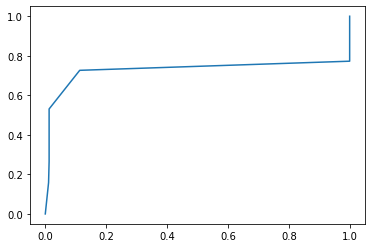

In [ ]:
#ROC AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,m1_pred_test,pos_label=1)
plt.plot(tpr,fpr)
a=auc(tpr,fpr)
print(a)

In [ ]:
#Second Model
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=20000)
st = time.time()
lr.fit(x_train,y_train)
et = time.time()
print("Training Logistic Regression Classifier Model -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Training Logistic Regression Classifier Model -> Time taken : 1440.4 milliseconds


In [ ]:
#Predicting Output Class on x_train
st = time.time()
m2_pred_train = lr.predict(x_train)
et = time.time()
print("Predicting on Training Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

#Predicting Output Class on x_test
st = time.time()
m2_pred_test = lr.predict(x_test)
et = time.time()
print("Predicting on Testing Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Predicting on Training Data -> Time taken : 9.2 milliseconds
Predicting on Testing Data -> Time taken : 7.7 milliseconds


In [ ]:
#Printing Accuracy score on pred_train and pred_test
print("Logistic Regression Classifier Model Training Accuracy :",accuracy_score(m2_pred_train,y_train))

print("Logistic Regression Classifier Model Testing Accuracy :",accuracy_score(m2_pred_test,y_test))

Logistic Regression Classifier Model Training Accuracy : 0.8246636149257872
Logistic Regression Classifier Model Testing Accuracy : 0.8200647249190939


Logistic Regression Classifier Training Confusion Matrix 
 [[1366    1    0    0    0    0]
 [   0  996  221    0    0    3]
 [   0  173 1149    0    0    1]
 [   0    0    0 1001  112  115]
 [   0    0    0  252  656   87]
 [   0    0    3  190  106  777]]


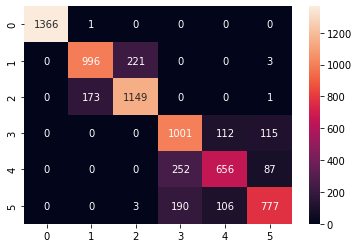

In [ ]:
#Plotting Confusion Matrix
#Training
m2_train_cm=confusion_matrix(y_train,m2_pred_train)
print("Logistic Regression Classifier Training Confusion Matrix \n",m2_train_cm)
sns.heatmap(m2_train_cm,annot=True,fmt='.0f')

Logistic Regression Classifier Testing Confusion Matrix 
 [[577   0   0   0   0   0]
 [  0 463  93   0   0   1]
 [  0  89 494   0   0   0]
 [  0   0   0 394  61  39]
 [  0   0   0 103 275  33]
 [  0   0   0  95  42 331]]


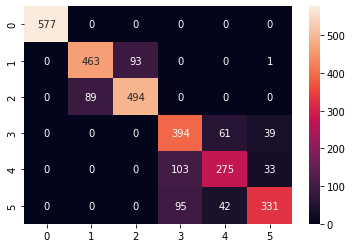

In [ ]:
#Plotting Confusion Matrix
#Testing
m2_test_cm=confusion_matrix(y_test,m2_pred_test)
print("Logistic Regression Classifier Testing Confusion Matrix \n",m2_test_cm)
sns.heatmap(m2_test_cm,annot=True,fmt='.0f')

In [ ]:
#Printing Classification Report For Logistic Regression Classifier Model

#Training 
m2_train_cpr=classification_report(m2_pred_train,y_train)
print("Logistic Regression Classifier Training Classification Report: \n",m2_train_cpr)

#Testing
m2_test_cpr=classification_report(m2_pred_test,y_test)
print("Logistic Regression Classifier Testing Classification Report: \n",m2_test_cpr)

Logistic Regression Classifier Training Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1366
           1       0.82      0.85      0.83      1170
           2       0.87      0.84      0.85      1373
           3       0.82      0.69      0.75      1443
           4       0.66      0.75      0.70       874
           5       0.72      0.79      0.75       983

    accuracy                           0.82      7209
   macro avg       0.81      0.82      0.82      7209
weighted avg       0.83      0.82      0.83      7209

Logistic Regression Classifier Testing Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       577
           1       0.83      0.84      0.83       552
           2       0.85      0.84      0.84       587
           3       0.80      0.67      0.73       592
           4       0.67      0.73      0.70       378
   

0.7342121695593038


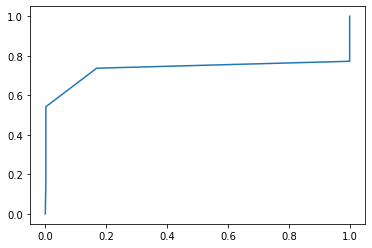

In [ ]:
#ROC AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,m2_pred_test,pos_label=1)
plt.plot(tpr,fpr)
a=auc(tpr,fpr)
print(a)

In [ ]:
#Third Model
#Support Vector Classifier (SVC)

from sklearn.svm import SVC
svc = SVC()
st = time.time()
svc.fit(x_train,y_train)
et = time.time()
print("Training SVC Model -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Training SVC Model -> Time taken : 707.1 milliseconds


In [ ]:
#Predicting Output Class on x_train
st = time.time()
m3_pred_train = svc.predict(x_train)
et = time.time()
print("Predicting on Training Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

#Predicting Output Class on x_test
st = time.time()
m3_pred_test = svc.predict(x_test)
et = time.time()
print("Predicting on Testing Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Predicting on Training Data -> Time taken : 1761.9 milliseconds
Predicting on Testing Data -> Time taken : 758.2 milliseconds


In [ ]:
#Printing Accuracy score on pred_train and pred_test
print("SVC Model Training Accuracy :",accuracy_score(m3_pred_train,y_train))

print("SVC Model Testing Accuracy :",accuracy_score(m3_pred_test,y_test))

SVC Model Training Accuracy : 0.8199472881120822
SVC Model Testing Accuracy : 0.8158576051779936


SVC Training Confusion Matrix 
 [[1367    0    0    0    0    0]
 [   0 1028  192    0    0    0]
 [   0  160 1163    0    0    0]
 [   0    0    0  951  144  133]
 [   0    0    0  301  629   65]
 [   0    0    0  253   50  773]]


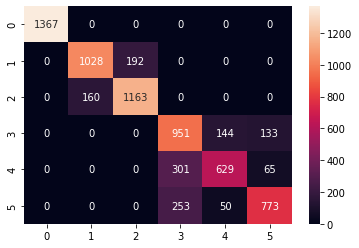

In [ ]:
#Plotting Confusion Matrix
#Training
m3_train_cm=confusion_matrix(y_train,m3_pred_train)
print("SVC Training Confusion Matrix \n",m3_train_cm)
sns.heatmap(m3_train_cm,annot=True,fmt='.0f')

SVC Testing Confusion Matrix 
 [[577   0   0   0   0   0]
 [  0 478  79   0   0   0]
 [  0  73 510   0   0   0]
 [  0   0   0 375  71  48]
 [  0   0   0 138 255  18]
 [  0   0   0 114  28 326]]


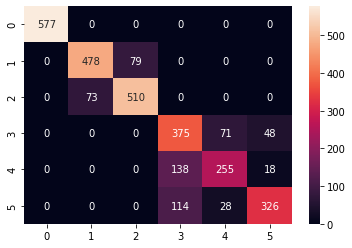

In [ ]:
#Plotting Confusion Matrix
#Testing
m3_test_cm=confusion_matrix(y_test,m3_pred_test)
print("SVC Testing Confusion Matrix \n",m3_test_cm)
sns.heatmap(m3_test_cm,annot=True,fmt='.0f')

In [ ]:
#Printing Classification Report For SVC Model

#Training 
m3_train_cpr=classification_report(m3_pred_train,y_train)
print("SVC Training Classification Report: \n",m3_train_cpr)

#Testing
m3_test_cpr=classification_report(m3_pred_test,y_test)
print("SVC Testing Classification Report: \n",m3_test_cpr)

SVC Training Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1367
           1       0.84      0.87      0.85      1188
           2       0.88      0.86      0.87      1355
           3       0.77      0.63      0.70      1505
           4       0.63      0.76      0.69       823
           5       0.72      0.80      0.76       971

    accuracy                           0.82      7209
   macro avg       0.81      0.82      0.81      7209
weighted avg       0.82      0.82      0.82      7209

SVC Testing Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       577
           1       0.86      0.87      0.86       551
           2       0.87      0.87      0.87       589
           3       0.76      0.60      0.67       627
           4       0.62      0.72      0.67       354
           5       0.70      0.83      0.76       392

  

0.7414750074598779


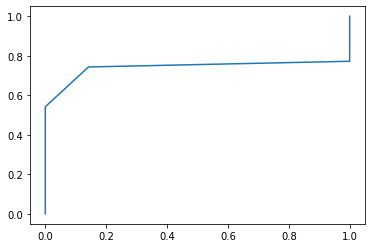

In [ ]:
#ROC AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,m3_pred_test,pos_label=1)
plt.plot(tpr,fpr)
a=auc(tpr,fpr)
print(a)

In [ ]:
#Fourth Model
#K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
st = time.time()
kn.fit(x_train,y_train)
et = time.time()
print("Training K-Neighbors Classifier Model -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Training K-Neighbors Classifier Model -> Time taken : 14.6 milliseconds


In [ ]:
#Predicting Output Class on x_train
st = time.time()
m4_pred_train = kn.predict(x_train)
et = time.time()
print("Predicting on Training Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

#Predicting Output Class on x_test
st = time.time()
m4_pred_test = kn.predict(x_test)
et = time.time()
print("Predicting on Testing Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Predicting on Training Data -> Time taken : 231.4 milliseconds
Predicting on Testing Data -> Time taken : 107.6 milliseconds


In [ ]:
#Printing Accuracy score on pred_train and pred_test
print("K-Neighbors Classifier Model Training Accuracy :",accuracy_score(m4_pred_train,y_train))

print("K-Neighbors Classifier Model Testing Accuracy :",accuracy_score(m4_pred_test,y_test))

K-Neighbors Classifier Model Training Accuracy : 0.922735469551949
K-Neighbors Classifier Model Testing Accuracy : 0.8566343042071197


K-Neighbors Classifier Training Confusion Matrix 
 [[1367    0    0    0    0    0]
 [   0 1162   58    0    0    0]
 [   0   62 1261    0    0    0]
 [   0    0    0 1118   65   45]
 [   0    0    0  155  821   19]
 [   0    0    0  117   36  923]]


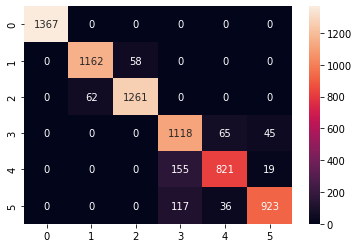

In [ ]:
#Plotting Confusion Matrix
#Training
m4_train_cm=confusion_matrix(y_train,m4_pred_train)
print("K-Neighbors Classifier Training Confusion Matrix \n",m4_train_cm)
sns.heatmap(m4_train_cm,annot=True,fmt='.0f')

K-Neighbors Classifier Testing Confusion Matrix 
 [[577   0   0   0   0   0]
 [  0 513  44   0   0   0]
 [  0  42 541   0   0   0]
 [  0   0   0 385  69  40]
 [  0   0   0 102 290  19]
 [  0   0   0  99  28 341]]


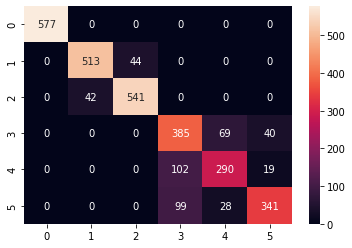

In [ ]:
#Plotting Confusion Matrix
#Testing
m4_test_cm=confusion_matrix(y_test,m4_pred_test)
print("K-Neighbors Classifier Testing Confusion Matrix \n",m4_test_cm)
sns.heatmap(m4_test_cm,annot=True,fmt='.0f')

In [ ]:
#Printing Classification Report For K-Neighbors Classifier Model

#Training 
m4_train_cpr=classification_report(m4_pred_train,y_train)
print("K-Neighbors Classifier Training Classification Report: \n",m4_train_cpr)

#Testing
m4_test_cpr=classification_report(m4_pred_test,y_test)
print("K-Neighbors Classifier Testing Classification Report: \n",m4_test_cpr)

K-Neighbors Classifier Training Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1367
           1       0.95      0.95      0.95      1224
           2       0.95      0.96      0.95      1319
           3       0.91      0.80      0.85      1390
           4       0.83      0.89      0.86       922
           5       0.86      0.94      0.89       987

    accuracy                           0.92      7209
   macro avg       0.92      0.92      0.92      7209
weighted avg       0.92      0.92      0.92      7209

K-Neighbors Classifier Testing Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       577
           1       0.92      0.92      0.92       555
           2       0.93      0.92      0.93       585
           3       0.78      0.66      0.71       586
           4       0.71      0.75      0.73       387
           5       

0.7548255309980078


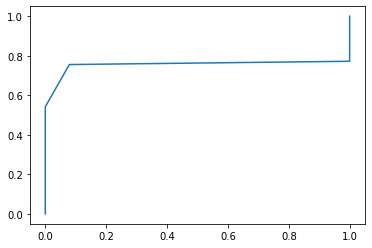

In [ ]:
#ROC AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,m4_pred_test,pos_label=1)
plt.plot(tpr,fpr)
a=auc(tpr,fpr)
print(a)

In [ ]:
#Fifth Model
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=18)
st = time.time()
dt.fit(x_train,y_train)
et = time.time()
print("Training Decision Tree Classifier Model -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Training Decision Tree Classifier Model -> Time taken : 85.4 milliseconds


In [ ]:
#Predicting Output Class on x_train
st = time.time()
m5_pred_train = dt.predict(x_train)
et = time.time()
print("Predicting on Training Data -> Time taken ",
      np.round((et-st)*1000,1),"milliseconds")

#Predicting Output Class on x_test
st = time.time()
m5_pred_test = dt.predict(x_test)
et = time.time()
print("Predicting on Testing Data -> Time taken ",
      np.round((et-st)*1000,1),"milliseconds")

Predicting on Training Data -> Time taken  9.3 milliseconds
Predicting on Testing Data -> Time taken  5.4 milliseconds


In [ ]:
#Printing Accuracy score on pred_train and pred_test
print("Decision Tree Classifier Model Training Accuracy :",accuracy_score(m5_pred_train,y_train))

print("Decision Tree Classifier Model Testing Accuracy :",accuracy_score(m5_pred_test,y_test))

Decision Tree Classifier Model Training Accuracy : 0.9993064225273963
Decision Tree Classifier Model Testing Accuracy : 0.8724919093851132


Decision Tree Classifier Training Confusion Matrix 
 [[1367    0    0    0    0    0]
 [   0 1220    0    0    0    0]
 [   0    4 1319    0    0    0]
 [   0    0    0 1228    0    0]
 [   0    0    0    1  994    0]
 [   0    0    0    0    0 1076]]


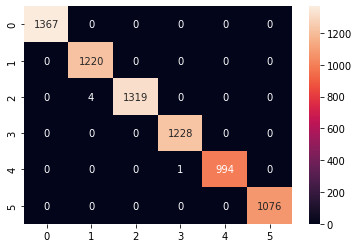

In [ ]:
#Plotting Confusion Matrix
#Training
m5_train_cm=confusion_matrix(y_train,m5_pred_train)
print("Decision Tree Classifier Training Confusion Matrix \n",m5_train_cm)
sns.heatmap(m5_train_cm,annot=True,fmt='.0f')

Decision Classifier Testing Confusion Matrix 
 [[577   0   0   0   0   0]
 [  0 482  75   0   0   0]
 [  0  62 521   0   0   0]
 [  0   0   0 403  58  33]
 [  0   0   0  56 316  39]
 [  0   0   0  39  32 397]]


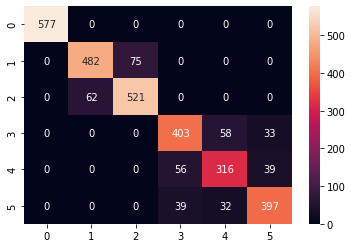

In [ ]:
#Plotting Confusion Matrix
#Testing
m5_test_cm=confusion_matrix(y_test,m5_pred_test)
print("Decision Classifier Testing Confusion Matrix \n",m5_test_cm)
sns.heatmap(m5_test_cm,annot=True,fmt='.0f')

In [ ]:
#Printing Classification Report For Decision Tree Classifier Model

#Training 
m5_train_cpr=classification_report(m5_pred_train,y_train)
print("Decision Tree Classifier Training Classification Report: \n",m5_train_cpr)

#Testing
m5_test_cpr=classification_report(m5_pred_test,y_test)
print("Decision Tree Classifier Testing Classification Report: \n",m5_test_cpr)

Decision Tree Classifier Training Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1367
           1       1.00      1.00      1.00      1224
           2       1.00      1.00      1.00      1319
           3       1.00      1.00      1.00      1229
           4       1.00      1.00      1.00       994
           5       1.00      1.00      1.00      1076

    accuracy                           1.00      7209
   macro avg       1.00      1.00      1.00      7209
weighted avg       1.00      1.00      1.00      7209

Decision Tree Classifier Testing Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       577
           1       0.87      0.89      0.88       544
           2       0.89      0.87      0.88       596
           3       0.82      0.81      0.81       498
           4       0.77      0.78      0.77       406
           5   

0.7444727797737726


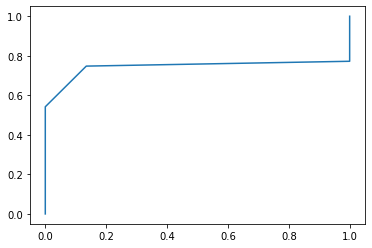

In [ ]:
#ROC AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,m5_pred_test,pos_label=1)
plt.plot(tpr,fpr)
a=auc(tpr,fpr)
print(a)

In [ ]:
#Sixth Model
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=21)
st = time.time()
rf.fit(x_train,y_train)
et = time.time()
print("Training Random Forest Classifier -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Training Random Forest Classifier -> Time taken : 1769.6 milliseconds


In [ ]:
#Predicting Output Class on x_train
st = time.time()
m6_pred_train = rf.predict(x_train)
et = time.time()
print("Predicting on Training Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

#Predicting Output Class on x_test
st = time.time()
m6_pred_test = rf.predict(x_test)
et = time.time()
print("Predicting on Testing Data -> Time taken :",
      np.round((et-st)*1000,1),"milliseconds")

Predicting on Training Data -> Time taken : 140.7 milliseconds
Predicting on Testing Data -> Time taken : 66.6 milliseconds


In [ ]:
#Printing Accuracy score on pred_train and pred_test
print("Random Forest Classifier Model Training Accuracy :",accuracy_score(m6_pred_train,y_train))

print("Random Forest Classifier Model Testing Accuracy :",accuracy_score(m6_pred_test,y_test))

Random Forest Classifier Model Training Accuracy : 1.0
Random Forest Classifier Model Testing Accuracy : 0.9103559870550162


Random Forest Classifier Training Confusion Matrix 
 [[1367    0    0    0    0    0]
 [   0 1220    0    0    0    0]
 [   0    0 1323    0    0    0]
 [   0    0    0 1228    0    0]
 [   0    0    0    0  995    0]
 [   0    0    0    0    0 1076]]


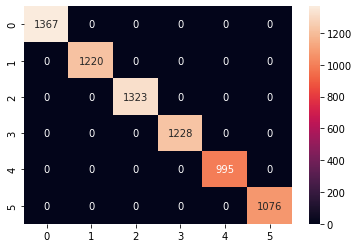

In [ ]:
#Plotting Confusion Matrix
#Training
m6_train_cm=confusion_matrix(y_train,m6_pred_train)
print("Random Forest Classifier Training Confusion Matrix \n",m6_train_cm)
sns.heatmap(m6_train_cm,annot=True,fmt='.0f')

Random Forest Classifier Testing Confusion Matrix 
 [[577   0   0   0   0   0]
 [  0 493  64   0   0   0]
 [  0  45 538   0   0   0]
 [  0   0   0 432  33  29]
 [  0   0   0  43 344  24]
 [  0   0   0  18  21 429]]


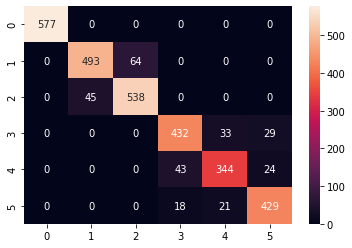

In [ ]:
#Plotting Confusion Matrix
#Testing
m6_test_cm=confusion_matrix(y_test,m6_pred_test)
print("Random Forest Classifier Testing Confusion Matrix \n",m6_test_cm)
sns.heatmap(m6_test_cm,annot=True,fmt='.0f')

In [ ]:
#Printing Classification Report for Random Forest Classifier Model

#Training 
m6_train_cpr=classification_report(m6_pred_train,y_train)
print("Random Forest Classifier Training Classification Report: \n",m6_train_cpr)

#Testing
m6_test_cpr=classification_report(m6_pred_test,y_test)
print("Random Forest Classifier Testing Classification Report: \n",m6_test_cpr)

Random Forest Classifier Training Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1367
           1       1.00      1.00      1.00      1220
           2       1.00      1.00      1.00      1323
           3       1.00      1.00      1.00      1228
           4       1.00      1.00      1.00       995
           5       1.00      1.00      1.00      1076

    accuracy                           1.00      7209
   macro avg       1.00      1.00      1.00      7209
weighted avg       1.00      1.00      1.00      7209

Random Forest Classifier Testing Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       577
           1       0.89      0.92      0.90       538
           2       0.92      0.89      0.91       602
           3       0.87      0.88      0.88       493
           4       0.84      0.86      0.85       398
           5   

0.7501011779164932


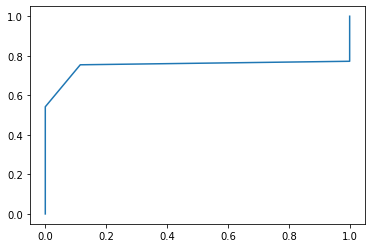

In [ ]:
#ROC AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,m6_pred_test,pos_label=1)
plt.plot(tpr,fpr)
a=auc(tpr,fpr)
print(a)

In [ ]:
#Comparision of Accuracy between selected Classifier Models

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf1 = Perceptron()
clf2 = LogisticRegression(max_iter=20000)
clf3 = SVC()
clf4 = KNeighborsClassifier()
clf5 = DecisionTreeClassifier()
clf6 = RandomForestClassifier(n_estimators=100,max_depth=21)

clf=[clf1,clf2,clf3,clf4,clf5,clf6]
clf_names=['Perc','LR','SVM','KNN','DT','RF']

test={}
T={}
for model,names in zip(clf,clf_names):
  st=time.time()
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  et=time.time()
  acc=accuracy_score(pred,y_test)
  test[names]=np.round(acc*100,1)
  T[names]=np.round((et-st)*1000,1)
for i in test.keys():
  print(i,"-",test[i],"-",T[i])

Perc - 79.8 - 37.8
LR - 82.0 - 1412.6
SVM - 81.6 - 1503.8
KNN - 85.7 - 111.5
DT - 86.1 - 80.4
RF - 91.5 - 1805.8


In [ ]:
#Here we can see that RANDOM FOREST gives the highest accuracy.

In [ ]:
#Cross-Validation for Random Forest Classifier

#Training
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=rf,X=x_train,y=y_train,cv=5)
print(scores)
print('Final CV accuracy train: %.2f +/- %.2f'%(np.mean(scores),np.std(scores)))

#Testing
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=rf,X=x_test,y=y_test,cv=5)
print(scores)
print('Final CV accuracy test: %.2f +/- %.2f'%(np.mean(scores),np.std(scores)))

[0.91886269 0.90984743 0.91539528 0.92163662 0.92852186]
Final CV accuracy train: 0.92 +/- 0.01
[0.87540453 0.88834951 0.91585761 0.90291262 0.89805825]
Final CV accuracy test: 0.90 +/- 0.01


In [ ]:
# Prediction 
pred = rf.predict(x_test)

In [ ]:
print(pred)

[1 4 0 ... 0 4 1]


In [ ]:
sol=pd.DataFrame(pred,columns=['Activity'])
print(sol.head())

   Activity
0         1
1         4
2         0
3         5
4         3


In [ ]:
sol.shape

(3090, 1)

In [ ]:
sol

,Activity
0,1
1,4
2,0
3,5
4,3
...,...
3085,0
3086,2
3087,0
3088,4


In [ ]:
sol.to_csv('Project_Output.csv',index=False)